<a href="https://colab.research.google.com/github/Windylubis/PORTOFOLIO-STREAMLIT_WINDYFALONALUBIS/blob/main/FINAL_DATA_SCIENCE_WINDYFALONALUBIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd  # For handling data in DataFrame format
import numpy as np  # For numerical operations and handling arrays
import seaborn as sns  # For data visualization, especially statistical plots
import matplotlib.pyplot as plt  # For creating plots and visualizations
import warnings  # To handle and suppress warnings in the code
from sklearn.utils import resample  # For data manipulation (e.g., resampling)

# Ignore warnings to avoid cluttering the output with unnecessary messages
warnings.filterwarnings("ignore")

In [ ]:
# Load the dataset for application records into a pandas DataFrame
app = pd.read_csv('/content/application_record.csv')

# Load the dataset for credit records into a pandas DataFrame
credit = pd.read_csv('/content/credit_record.csv')

In [ ]:
def bar_plot(df, column):
    # Create a count plot (bar plot) for the specified column in the DataFrame
    sns.countplot(data=df, x=column)

    # Add the x-axis label with the column name
    plt.xlabel(column)

    # Add the y-axis label with 'Count'
    plt.ylabel("Count")

    # Display the plot
    plt.show()

In [ ]:
app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [ ]:
# Group the 'credit' DataFrame by the 'ID' column and calculate the minimum 'MONTHS_BALANCE' for each group
begin_month = pd.DataFrame(credit.groupby(["ID"])["MONTHS_BALANCE"].agg(min))

In [ ]:
# Rename the 'MONTHS_BALANCE' column to 'first_month' in the 'begin_month' DataFrame
begin_month = begin_month.rename(columns={'MONTHS_BALANCE': 'first_month'})

In [ ]:
# Gabungkan dengan data aplikasi
data = pd.merge(app, begin_month, how="left", on="ID")

# Proses data kredit untuk menentukan status (0 = baik, 1 = bermasalah)
credit['STATUS'].replace({'C': 0, 'X': 0}, inplace=True)
credit['STATUS'] = credit['STATUS'].astype('int')
credit['STATUS'] = credit['STATUS'].apply(lambda x: 1 if x > 0 else 0)

# Gabungkan status ke data utama
df = credit.drop('MONTHS_BALANCE', axis=1)
data = pd.merge(data, df, how="left", on="ID")

# Hapus baris dengan nilai null
data.dropna(inplace=True)

# Hapus kolom ID yang tidak diperlukan
data.drop("ID", axis=1, inplace=True)

# Tampilkan info dataset
print("Informasi Dataset:")
print(data.info())

# Tampilkan 5 baris pertama
print("\n5 Baris Pertama Data:")
print(data.head())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 537667 entries, 31 to 1176070
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          537667 non-null  object 
 1   FLAG_OWN_CAR         537667 non-null  object 
 2   FLAG_OWN_REALTY      537667 non-null  object 
 3   CNT_CHILDREN         537667 non-null  int64  
 4   AMT_INCOME_TOTAL     537667 non-null  float64
 5   NAME_INCOME_TYPE     537667 non-null  object 
 6   NAME_EDUCATION_TYPE  537667 non-null  object 
 7   NAME_FAMILY_STATUS   537667 non-null  object 
 8   NAME_HOUSING_TYPE    537667 non-null  object 
 9   DAYS_BIRTH           537667 non-null  int64  
 10  DAYS_EMPLOYED        537667 non-null  int64  
 11  FLAG_MOBIL           537667 non-null  int64  
 12  FLAG_WORK_PHONE      537667 non-null  int64  
 13  FLAG_PHONE           537667 non-null  int64  
 14  FLAG_EMAIL           537667 non-null  int64  
 15  O

In [ ]:
app.shape

(438557, 18)

In [ ]:
credit['STATUS'].value_counts()

,count
STATUS,
0,1034381
1,14194


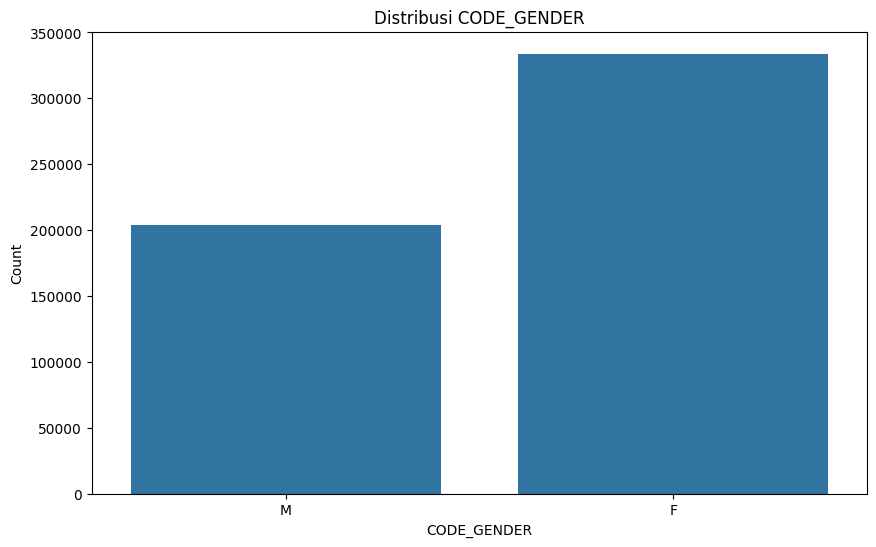

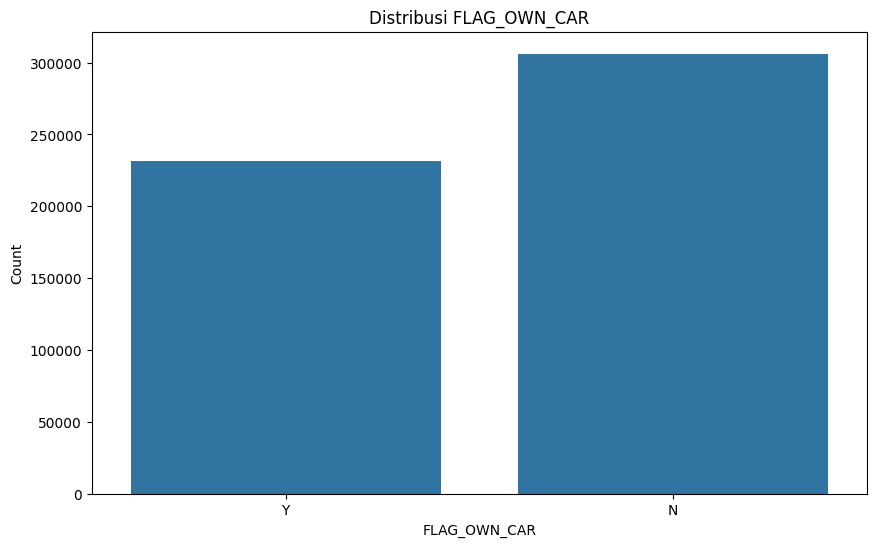

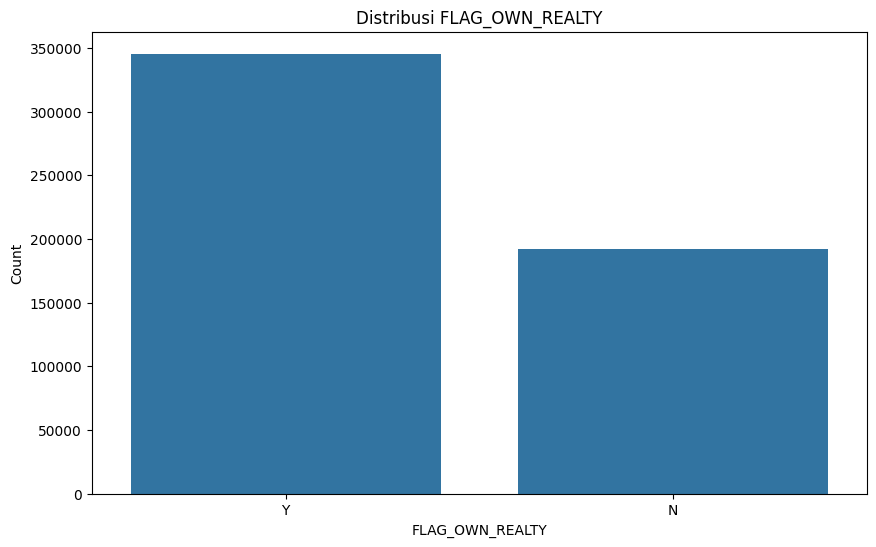

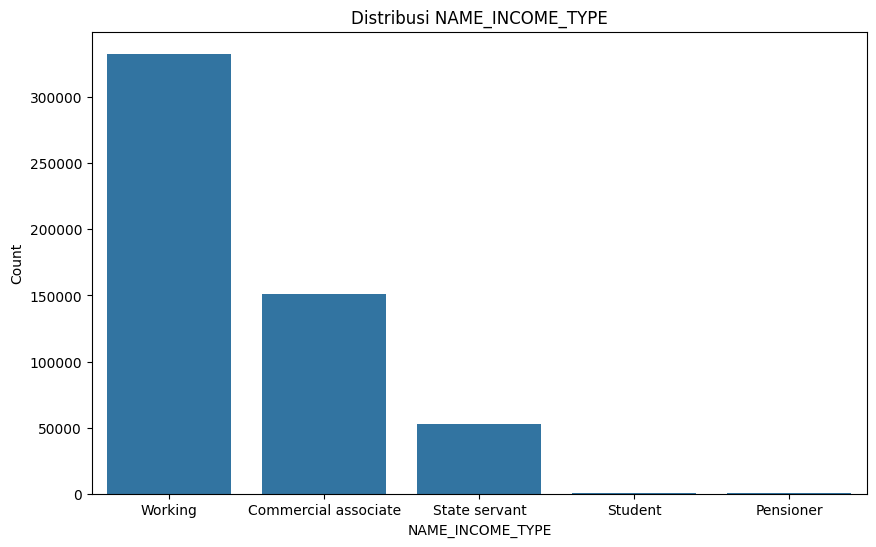

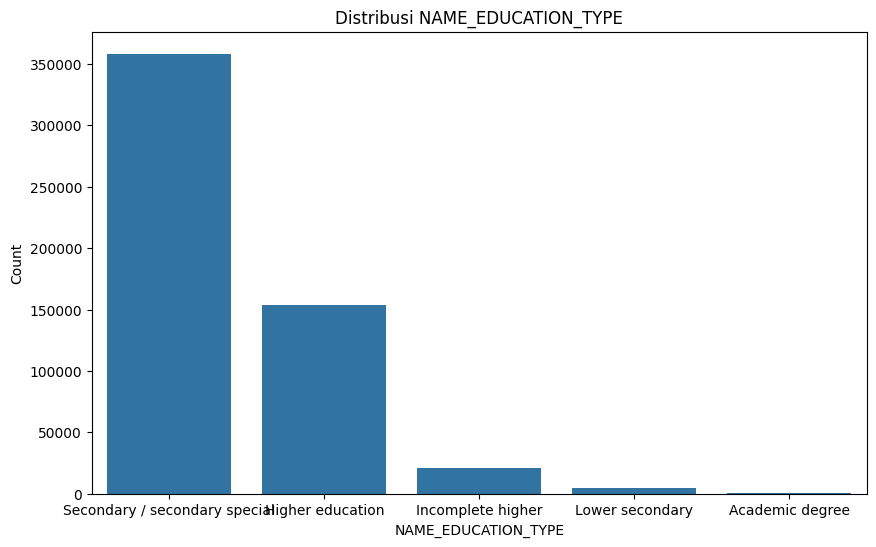

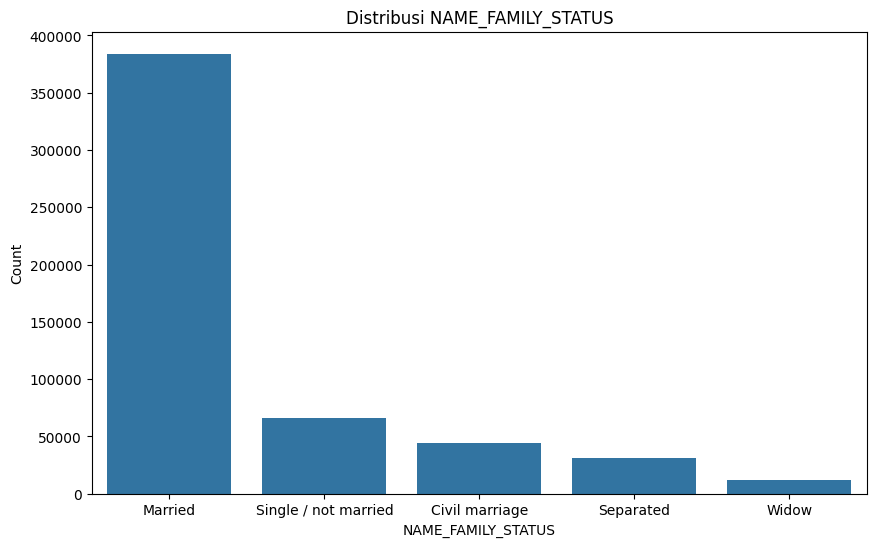

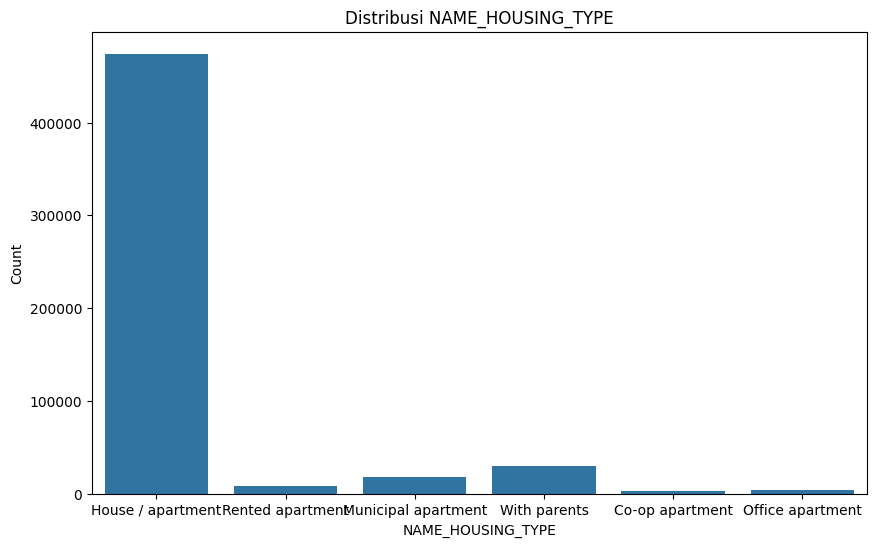

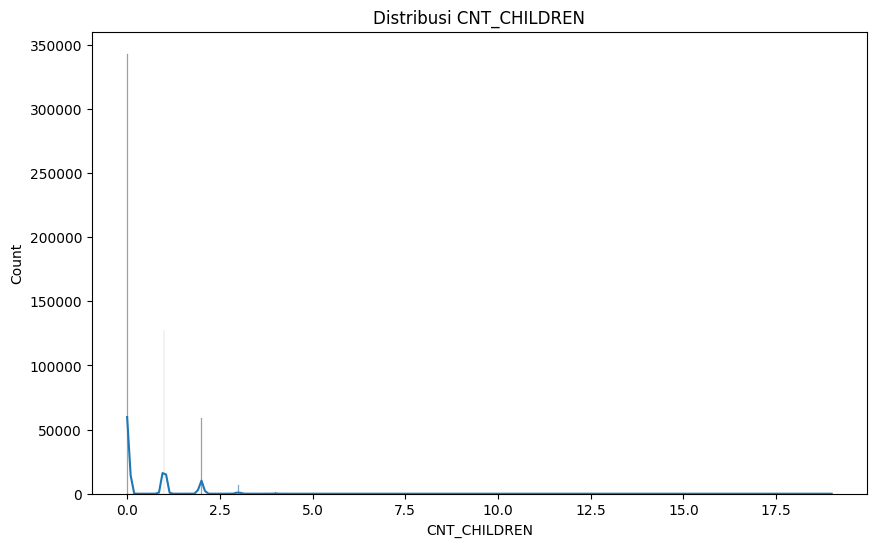

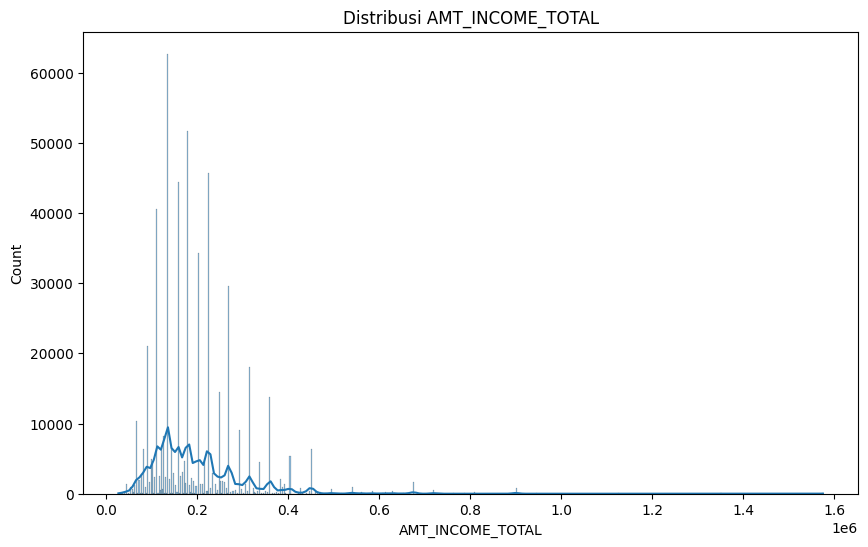

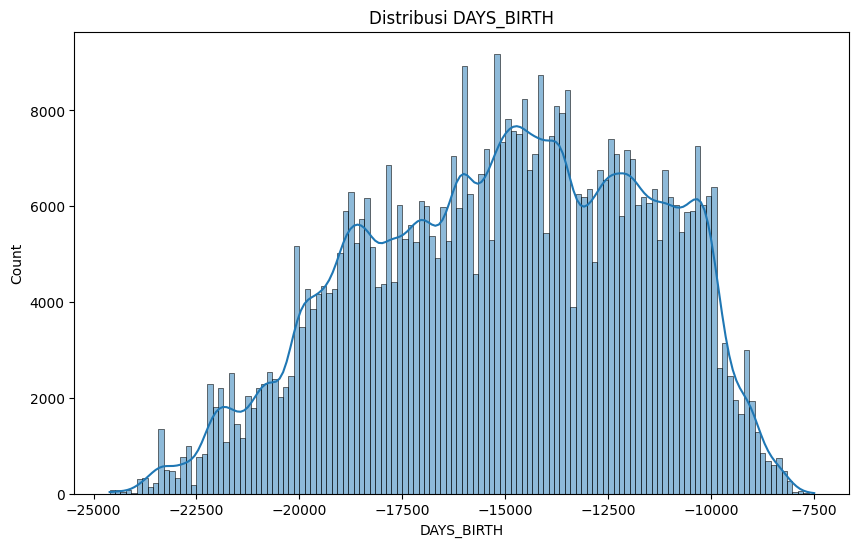

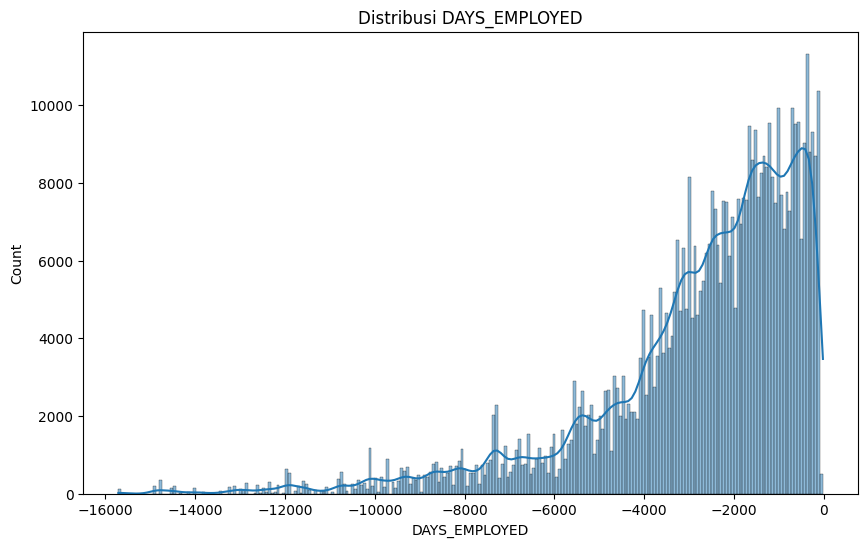

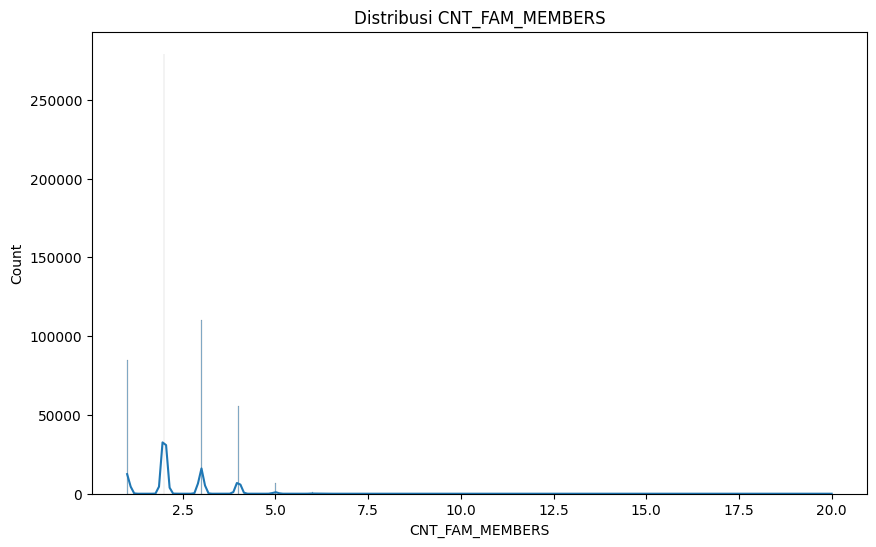

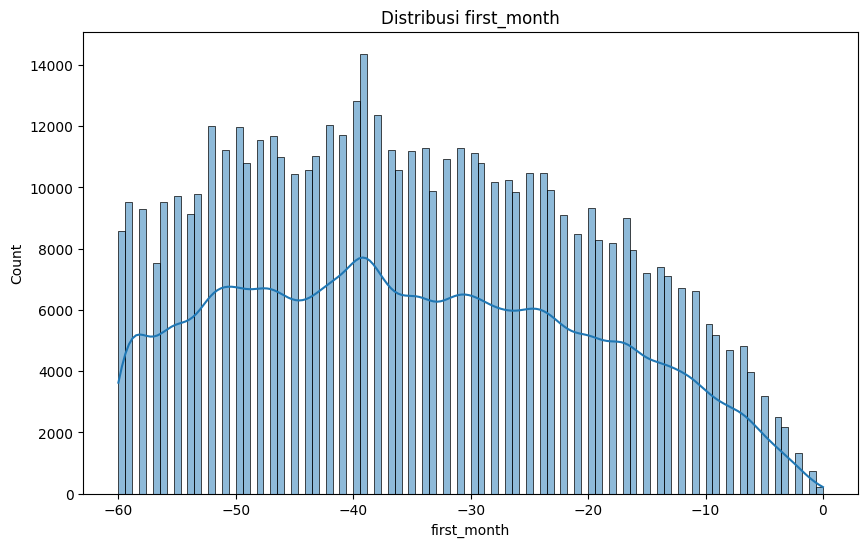


Jumlah Duplikat: 512570


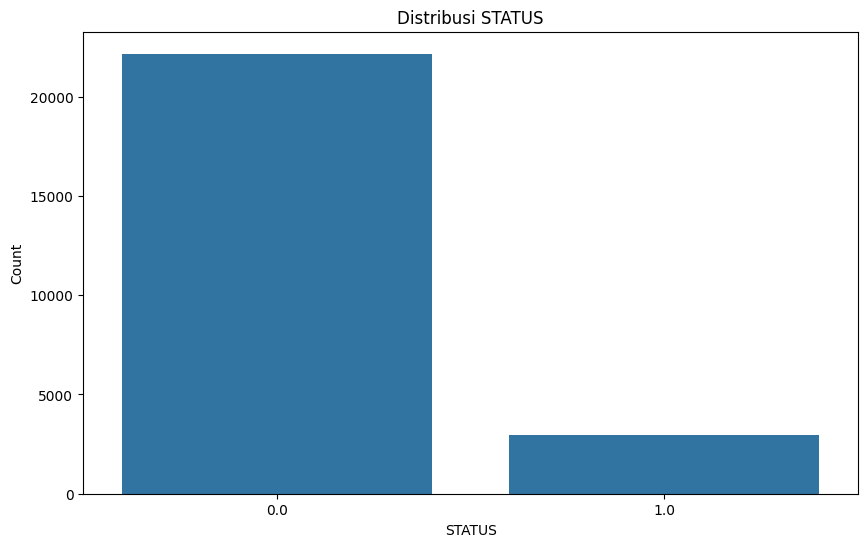


Distribusi Target Variable:
STATUS
0.0    0.882894
1.0    0.117106
Name: proportion, dtype: float64


In [ ]:
# Fungsi untuk visualisasi distribusi
def plot_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribusi {column}')
    plt.show()

# Fungsi untuk visualisasi count plot
def bar_plot(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.title(f'Distribusi {column}')
    plt.show()

# 1. Analisis Variabel Kategorikal
categorical_cols = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
                    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']

for col in categorical_cols:
    bar_plot(data, col)

# 2. Analisis Variabel Numerik
numeric_cols = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
                'CNT_FAM_MEMBERS', 'first_month']

for col in numeric_cols:
    plot_distribution(data, col)

# 3. Handle Outliers pada variabel numerik
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

for col in numeric_cols:
    data = handle_outliers(data, col)

# 4. Konversi DAYS_BIRTH dan DAYS_EMPLOYED ke tahun
data['AGE'] = -data['DAYS_BIRTH'] / 365
data['YEARS_EMPLOYED'] = -data['DAYS_EMPLOYED'] / 365

# Hapus kolom aslinya
data.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED'], axis=1, inplace=True)

# 5. Periksa duplikat
print("\nJumlah Duplikat:", data.duplicated().sum())

# Hapus duplikat jika ada
data.drop_duplicates(inplace=True)

# 6. Analisis target variable
bar_plot(data, 'STATUS')
print("\nDistribusi Target Variable:")
print(data['STATUS'].value_counts(normalize=True))

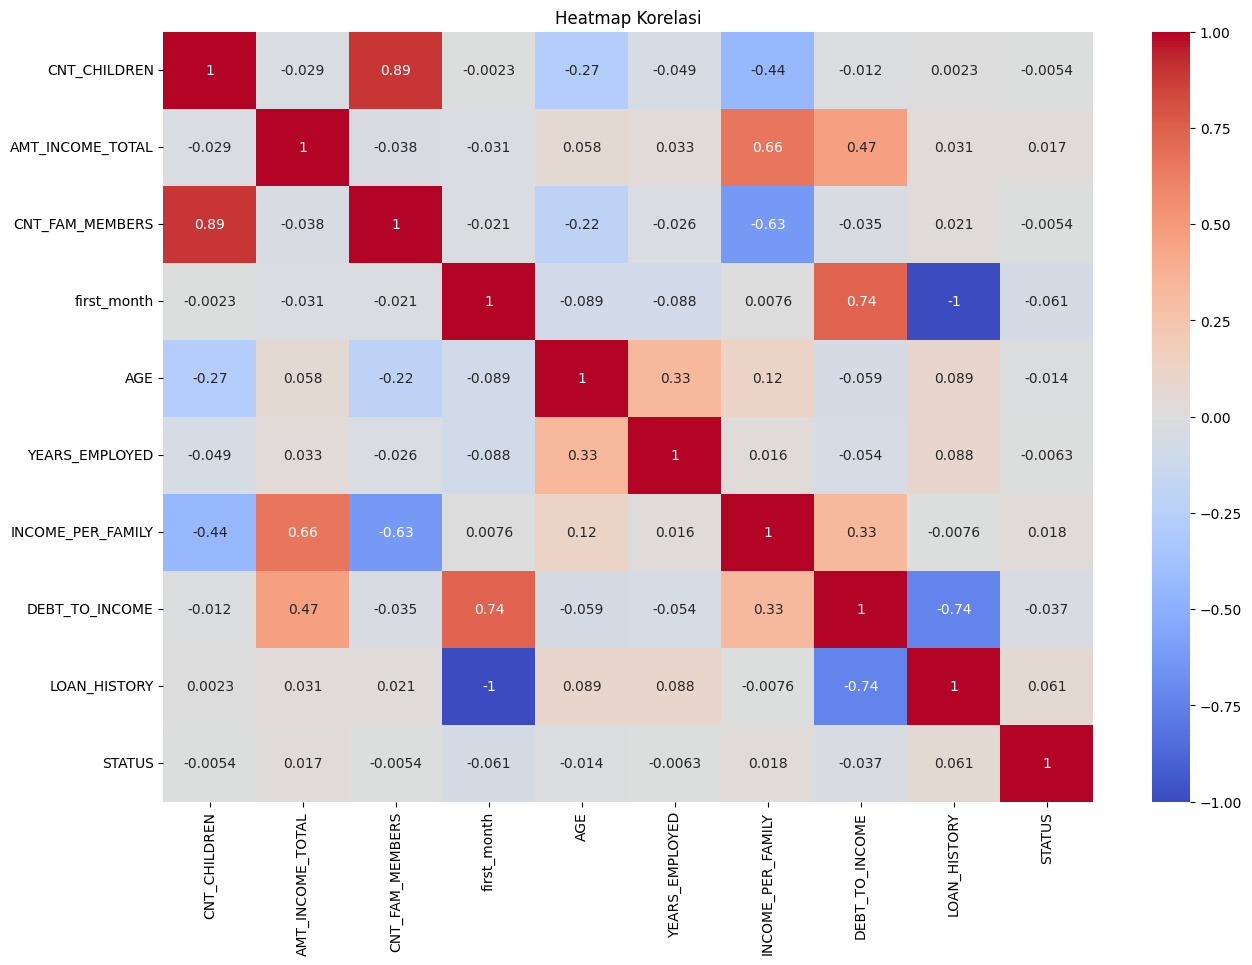

In [ ]:
# 1. Buat fitur baru: rasio pendapatan per anggota keluarga
data['INCOME_PER_FAMILY'] = data['AMT_INCOME_TOTAL'] / data['CNT_FAM_MEMBERS']

# 2. Kategorikan usia
bins = [0, 30, 40, 50, 60, 100]
labels = ['<30', '30-40', '40-50', '50-60', '60+']
data['AGE_GROUP'] = pd.cut(data['AGE'], bins=bins, labels=labels)

# 3. Kategorikan tahun bekerja
data['WORK_EXPERIENCE'] = pd.cut(data['YEARS_EMPLOYED'],
                                bins=[-1, 0, 5, 10, 20, 100],
                                labels=['None', '1-5', '5-10', '10-20', '20+'])

# 4. Hitung debt-to-income ratio
data['DEBT_TO_INCOME'] = data['first_month'] / data['AMT_INCOME_TOTAL']

# 5. Hitung jumlah pinjaman sebelumnya (asumsi first_month menunjukkan durasi)
data['LOAN_HISTORY'] = -data['first_month']

# Update numeric_cols dengan fitur baru
numeric_cols = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS',
                'first_month', 'AGE', 'YEARS_EMPLOYED', 'INCOME_PER_FAMILY',
                'DEBT_TO_INCOME', 'LOAN_HISTORY']

# Update categorical_cols dengan fitur baru
categorical_cols = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
                    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                    'AGE_GROUP', 'WORK_EXPERIENCE']

# Visualisasi korelasi
plt.figure(figsize=(15, 10))
corr = data[numeric_cols + ['STATUS']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap Korelasi')
plt.show()

In [ ]:
# Check for missing (null) values in the 'data' DataFrame and sum them for each column
data.isnull().sum()

,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0
FLAG_MOBIL,0


In [ ]:
# Drop the 'OCCUPATION_TYPE' column from the 'data' DataFrame due to missing values
data.drop(columns=["OCCUPATION_TYPE"], inplace=True)

In [ ]:
data.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,...,CNT_FAM_MEMBERS,first_month,STATUS,AGE,YEARS_EMPLOYED,INCOME_PER_FAMILY,AGE_GROUP,WORK_EXPERIENCE,DEBT_TO_INCOME,LOAN_HISTORY
31,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,...,2.0,-29.0,0.0,58.832877,3.106849,56250.0,50-60,1-5,-0.000258,29.0
61,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,...,1.0,-4.0,0.0,52.356164,8.358904,270000.0,50-60,5-10,-0.000015,4.0
66,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,...,1.0,-26.0,0.0,52.356164,8.358904,270000.0,50-60,5-10,-0.000096,26.0
98,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,...,1.0,-38.0,0.0,52.356164,8.358904,270000.0,50-60,5-10,-0.000141,38.0
188,M,Y,Y,0.0,270000.0,Working,Higher education,Married,House / apartment,1,...,2.0,-5.0,0.0,46.224658,2.106849,135000.0,40-50,1-5,-0.000019,5.0


In [ ]:
data.dropna(inplace = True)

In [ ]:
data["CODE_GENDER"].value_counts()

,count
CODE_GENDER,
F,15516
M,9581


In [ ]:
data["CODE_GENDER"].describe()

,CODE_GENDER
count,25097
unique,2
top,F
freq,15516


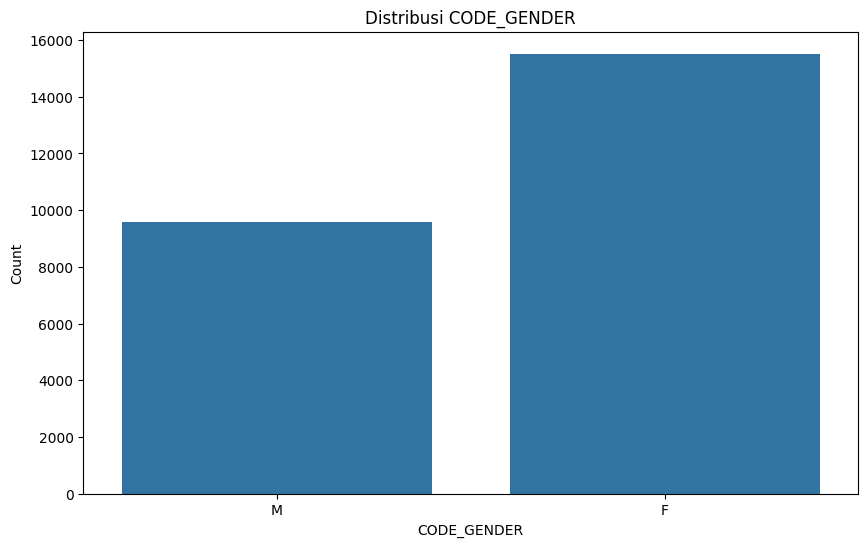

In [ ]:
bar_plot(data , "CODE_GENDER")

In [ ]:
data["FLAG_OWN_CAR"].value_counts()

,count
FLAG_OWN_CAR,
N,14672
Y,10425


In [ ]:
data["FLAG_OWN_REALTY"].value_counts()

,count
FLAG_OWN_REALTY,
Y,16320
N,8777


In [ ]:
data["FLAG_OWN_REALTY"].describe()

,FLAG_OWN_REALTY
count,25097
unique,2
top,Y
freq,16320


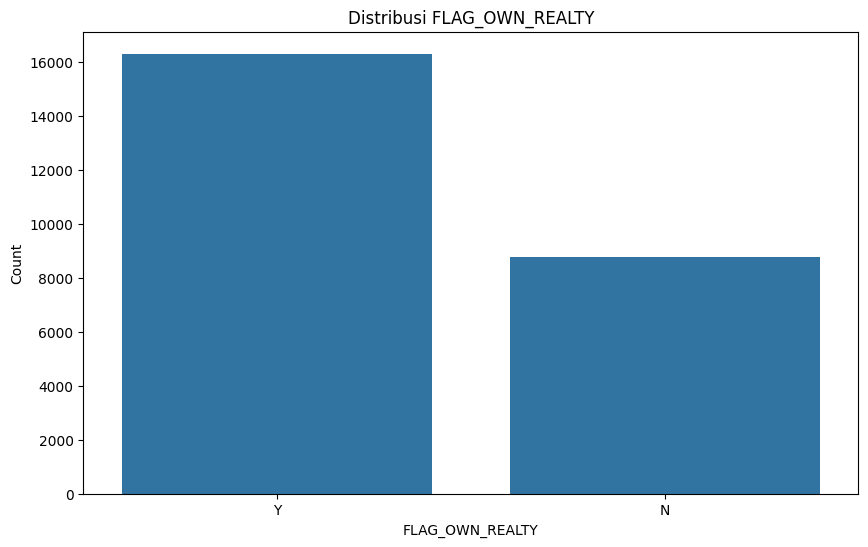

In [ ]:
bar_plot(data , "FLAG_OWN_REALTY")

In [ ]:
data["CNT_CHILDREN"].value_counts()

,count
CNT_CHILDREN,
0.0,15898
1.0,6078
2.0,2725
2.5,396


In [ ]:
data["CNT_CHILDREN"].describe()

,CNT_CHILDREN
count,25097.000000
mean,0.498785
std,0.725498
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.500000


In [ ]:
# Replace values in the 'CNT_CHILDREN' column that are greater than 3 with 3
data.loc[data["CNT_CHILDREN"] > 3, "CNT_CHILDREN"] = 3

# Check the count of unique values in the 'CNT_CHILDREN' column
data["CNT_CHILDREN"].value_counts()

,count
CNT_CHILDREN,
0.0,15898
1.0,6078
2.0,2725
2.5,396


In [ ]:
data["AMT_INCOME_TOTAL"].describe()

,AMT_INCOME_TOTAL
count,25097.000000
mean,188250.548193
std,80113.186499
min,27000.000000
25%,135000.000000
50%,180000.000000
75%,225000.000000
max,371250.000000


<Axes: xlabel='AMT_INCOME_TOTAL'>

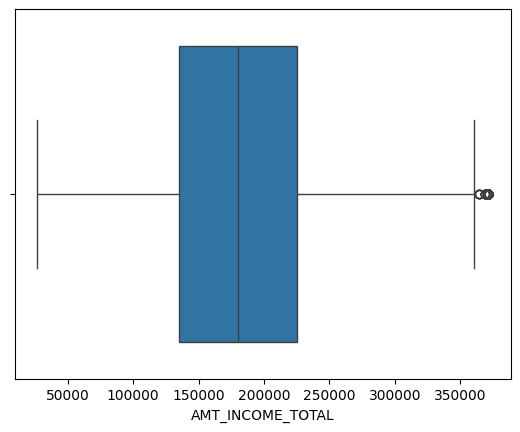

In [ ]:
sns.boxplot(data = data , x=data["AMT_INCOME_TOTAL"] )

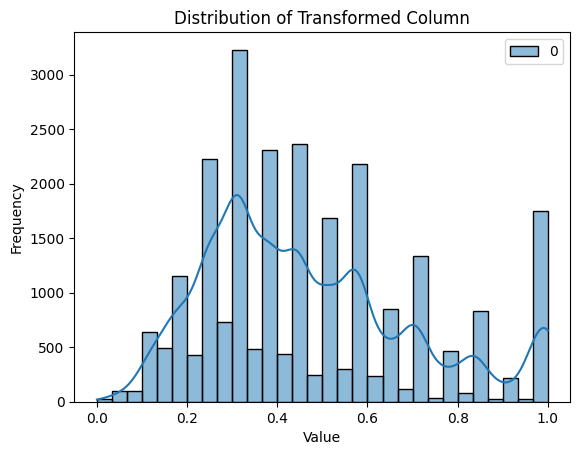

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'AMT_INCOME_TOTAL' column to scale it between 0 and 1
normalized_column = scaler.fit_transform(data[["AMT_INCOME_TOTAL"]])

# Create a histogram with a Kernel Density Estimate (KDE) to show the distribution of the normalized column
sns.histplot(normalized_column, kde=True, bins=30)

# Add a title and labels to the plot
plt.title("Distribution of Transformed Column")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Show the plot
plt.show()

count      5886.000000
mean      98792.373853
std       19877.773920
min       27000.000000
25%       90000.000000
50%      108000.000000
75%      112500.000000
max      129150.000000
Name: AMT_INCOME_TOTAL, dtype: float64


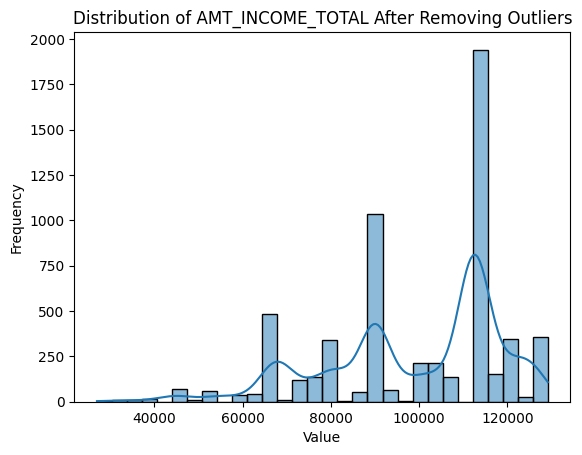

In [ ]:
# Step 1: Save the original 'AMT_INCOME_TOTAL' column in a new column
data["AMT_INCOME_TOTAL_ORIGINAL"] = data["AMT_INCOME_TOTAL"]

# Step 2: Normalize the 'AMT_INCOME_TOTAL' column using MinMaxScaler
scaler = MinMaxScaler()
data["AMT_INCOME_TOTAL_NORMALIZED"] = scaler.fit_transform(data[["AMT_INCOME_TOTAL"]])

# Step 3: Remove rows where the normalized 'AMT_INCOME_TOTAL' is greater than 0.3
data = data[data["AMT_INCOME_TOTAL_NORMALIZED"] <= 0.3].reset_index(drop=True)

# Step 4: Restore the original 'AMT_INCOME_TOTAL' column
data["AMT_INCOME_TOTAL"] = data["AMT_INCOME_TOTAL_ORIGINAL"]

# Step 5: Drop the normalized columns to clean the data
data.drop(columns=["AMT_INCOME_TOTAL_NORMALIZED", "AMT_INCOME_TOTAL_ORIGINAL"], inplace=True)

# Step 6: Print the descriptive statistics for the 'AMT_INCOME_TOTAL' column
print(data["AMT_INCOME_TOTAL"].describe())

# Step 7: Plot the distribution of 'AMT_INCOME_TOTAL' after removing outliers
sns.histplot(data["AMT_INCOME_TOTAL"], kde=True, bins=30)
plt.title("Distribution of AMT_INCOME_TOTAL After Removing Outliers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
data["NAME_INCOME_TYPE"].value_counts()

,count
NAME_INCOME_TYPE,
Working,4187
Commercial associate,1103
State servant,594
Student,2


In [ ]:
# Filter out rows where the 'NAME_INCOME_TYPE' is 'Pensioner' or 'Student'
data = data[~data["NAME_INCOME_TYPE"].isin(["Pensioner", "Student"])].reset_index(drop=True)

# Display the value counts for the 'NAME_INCOME_TYPE' column after filtering
print(data["NAME_INCOME_TYPE"].value_counts())

NAME_INCOME_TYPE
Working                 4187
Commercial associate    1103
State servant            594
Name: count, dtype: int64


In [ ]:
data["NAME_EDUCATION_TYPE"].value_counts()

,count
NAME_EDUCATION_TYPE,
Secondary / secondary special,4659
Higher education,1032
Incomplete higher,154
Lower secondary,39


In [ ]:
# Define a mapping of old education types to new categories
education_mapping = {
    "Higher education": "University education / complete",
    "Incomplete higher": "University education / complete",
    "Academic degree": "University education / complete",
    "Secondary / secondary special": "Pre-university education",
    "Lower secondary": "Pre-university education"
}

# Replace the values in the 'NAME_EDUCATION_TYPE' column based on the mapping
data["NAME_EDUCATION_TYPE"] = data["NAME_EDUCATION_TYPE"].replace(education_mapping)

# Display the value counts for the 'NAME_EDUCATION_TYPE' column after replacement
print(data["NAME_EDUCATION_TYPE"].value_counts())

NAME_EDUCATION_TYPE
Pre-university education           4698
University education / complete    1186
Name: count, dtype: int64


In [ ]:
data["NAME_HOUSING_TYPE"].value_counts()

,count
NAME_HOUSING_TYPE,
House / apartment,5123
With parents,388
Municipal apartment,232
Rented apartment,89
Co-op apartment,26
Office apartment,26


In [ ]:
data["YEARS_EMPLOYED"].describe()

,YEARS_EMPLOYED
count,5884.000000
mean,6.581061
std,5.671948
min,0.180822
25%,2.241096
50%,4.731507
75%,9.071233
max,20.760274


<Axes: xlabel='YEARS_EMPLOYED'>

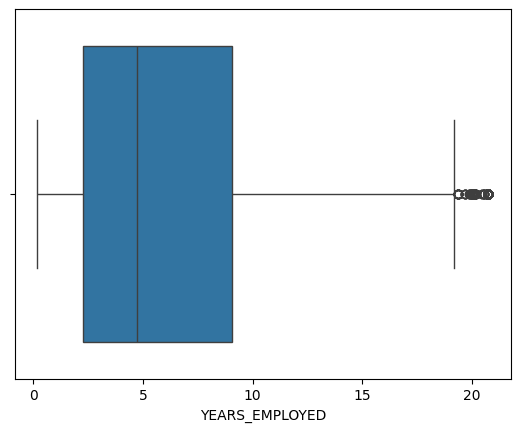

In [ ]:
sns.boxplot(data = data , x=data["YEARS_EMPLOYED"] )

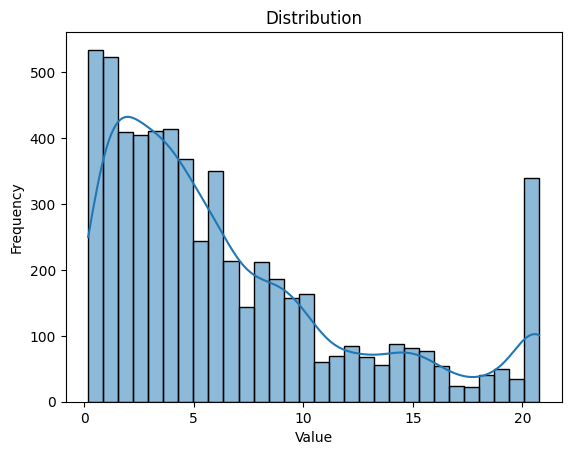

In [ ]:
sns.histplot(data["YEARS_EMPLOYED"], kde=True, bins=30)
plt.title("Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

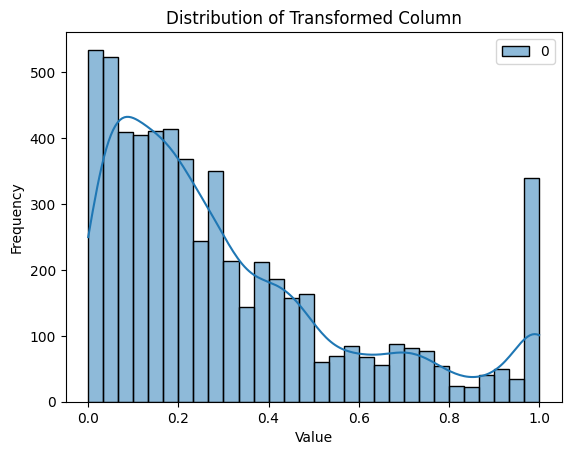

In [ ]:
normalized_column = scaler.fit_transform(data[["YEARS_EMPLOYED"]])


sns.histplot(normalized_column, kde=True, bins=30)
plt.title("Distribution of Transformed Column")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

count    1657.000000
mean       14.273310
std         4.364320
min         8.416438
25%        10.043836
50%        13.723288
75%        18.810959
max        20.760274
Name: YEARS_EMPLOYED, dtype: float64


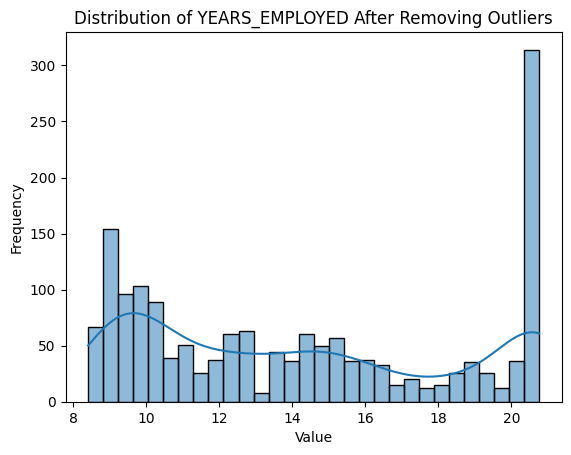

In [ ]:
# Save the original 'DAYS_EMPLOYED' column as a backup
data["YEARS_EMPLOYED_ORIGINAL"] = data["YEARS_EMPLOYED"]

# Normalize the 'DAYS_EMPLOYED' column using MinMaxScaler
scaler = MinMaxScaler()
data["YEARS_EMPLOYED_NORMALIZED"] = scaler.fit_transform(data[["YEARS_EMPLOYED"]])

# Filter out rows where the normalized 'DAYS_EMPLOYED' is less than 0.4
data = data[data["YEARS_EMPLOYED_NORMALIZED"] >= 0.4].reset_index(drop=True)

# Restore the original 'DAYS_EMPLOYED' column
data["YEARS_EMPLOYED"] = data["YEARS_EMPLOYED_ORIGINAL"]

# Drop the temporary normalized columns
data.drop(columns=["YEARS_EMPLOYED_NORMALIZED", "YEARS_EMPLOYED_ORIGINAL"], inplace=True)

# Display the descriptive statistics of the 'DAYS_EMPLOYED' column
print(data["YEARS_EMPLOYED"].describe())

# Plot the distribution of 'DAYS_EMPLOYED' after removing outliers
sns.histplot(data["YEARS_EMPLOYED"], kde=True, bins=30)
plt.title("Distribution of YEARS_EMPLOYED After Removing Outliers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
data["FLAG_MOBIL"].value_counts()

,count
FLAG_MOBIL,
1,1657


In [ ]:
data = data.drop(columns=["FLAG_MOBIL"])

In [ ]:
data.drop(columns=["FLAG_EMAIL"] , inplace = True)

In [ ]:
data["FLAG_WORK_PHONE"].value_counts()

,count
FLAG_WORK_PHONE,
0,1002
1,655


In [ ]:
data["CNT_FAM_MEMBERS"].value_counts()

,count
CNT_FAM_MEMBERS,
2.0,956
3.0,330
1.0,188
4.0,167
4.5,16


In [ ]:
data = data[data["CNT_FAM_MEMBERS"] <= 4]

print(data["CNT_FAM_MEMBERS"].value_counts())

CNT_FAM_MEMBERS
2.0    956
3.0    330
1.0    188
4.0    167
Name: count, dtype: int64


In [ ]:
data["first_month"].describe()

,first_month
count,1641.000000
mean,-27.217550
std,16.281767
min,-60.000000
25%,-40.000000
50%,-26.000000
75%,-13.000000
max,0.000000


<Axes: xlabel='first_month'>

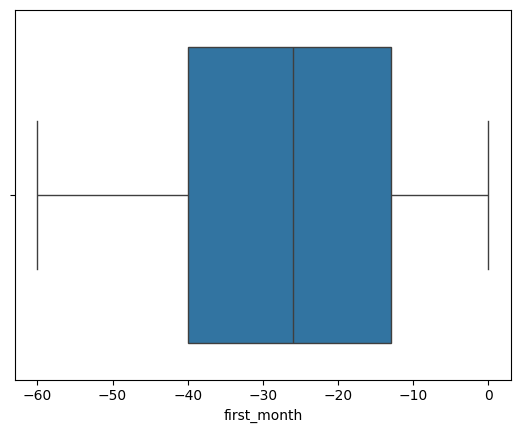

In [ ]:
sns.boxplot(data = data , x=data["first_month"] )

In [ ]:
data

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,...,CNT_FAM_MEMBERS,first_month,STATUS,AGE,YEARS_EMPLOYED,INCOME_PER_FAMILY,AGE_GROUP,WORK_EXPERIENCE,DEBT_TO_INCOME,LOAN_HISTORY
0,M,Y,Y,0.0,112500.0,Commercial associate,Pre-university education,Married,House / apartment,0,...,2.0,-43.0,0.0,56.169863,12.191781,56250.0,50-60,10-20,-0.000382,43.0
1,M,Y,Y,0.0,112500.0,Commercial associate,Pre-university education,Married,House / apartment,0,...,2.0,-11.0,0.0,56.169863,12.191781,56250.0,50-60,10-20,-0.000098,11.0
2,M,Y,Y,0.0,112500.0,Commercial associate,Pre-university education,Married,House / apartment,0,...,2.0,-46.0,0.0,56.169863,12.191781,56250.0,50-60,10-20,-0.000409,46.0
3,M,Y,Y,0.0,112500.0,Commercial associate,Pre-university education,Married,House / apartment,0,...,2.0,-51.0,0.0,56.169863,12.191781,56250.0,50-60,10-20,-0.000453,51.0
4,M,Y,Y,0.0,112500.0,Commercial associate,Pre-university education,Married,House / apartment,0,...,2.0,-25.0,0.0,56.169863,12.191781,56250.0,50-60,10-20,-0.000222,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,M,N,N,1.0,85500.0,State servant,Pre-university education,Married,Municipal apartment,0,...,3.0,-44.0,1.0,41.134247,18.810959,28500.0,40-50,10-20,-0.000515,44.0
1653,F,N,Y,0.0,121500.0,Working,Pre-university education,Married,House / apartment,0,...,2.0,-34.0,0.0,51.975342,20.760274,60750.0,50-60,20+,-0.000280,34.0
1654,F,N,Y,0.0,121500.0,Working,Pre-university education,Married,House / apartment,0,...,2.0,-34.0,1.0,51.975342,20.760274,60750.0,50-60,20+,-0.000280,34.0
1655,F,N,Y,0.0,112500.0,Working,University education / complete,Married,House / apartment,0,...,2.0,-26.0,0.0,33.189041,10.969863,56250.0,30-40,10-20,-0.000231,26.0


In [ ]:
print(data.columns.tolist())


['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'CNT_FAM_MEMBERS', 'first_month', 'STATUS', 'AGE', 'YEARS_EMPLOYED', 'INCOME_PER_FAMILY', 'AGE_GROUP', 'WORK_EXPERIENCE', 'DEBT_TO_INCOME', 'LOAN_HISTORY']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Define the list of categorical columns to encode
columns = ["CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY",
           "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE",
           "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE"]

# Create a copy of the data
data2 = data

# Loop through each column in the 'columns' list and apply LabelEncoder
for column in columns:
    # Encode the categorical column and update it in data2
    data2[column] = encoder.fit_transform(data[column])

# Display the transformed data
data2

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,...,CNT_FAM_MEMBERS,first_month,STATUS,AGE,YEARS_EMPLOYED,INCOME_PER_FAMILY,AGE_GROUP,WORK_EXPERIENCE,DEBT_TO_INCOME,LOAN_HISTORY
0,1,1,1,0.0,112500.0,0,0,1,1,0,...,2.0,-43.0,0.0,56.169863,12.191781,56250.0,50-60,10-20,-0.000382,43.0
1,1,1,1,0.0,112500.0,0,0,1,1,0,...,2.0,-11.0,0.0,56.169863,12.191781,56250.0,50-60,10-20,-0.000098,11.0
2,1,1,1,0.0,112500.0,0,0,1,1,0,...,2.0,-46.0,0.0,56.169863,12.191781,56250.0,50-60,10-20,-0.000409,46.0
3,1,1,1,0.0,112500.0,0,0,1,1,0,...,2.0,-51.0,0.0,56.169863,12.191781,56250.0,50-60,10-20,-0.000453,51.0
4,1,1,1,0.0,112500.0,0,0,1,1,0,...,2.0,-25.0,0.0,56.169863,12.191781,56250.0,50-60,10-20,-0.000222,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,1,0,0,1.0,85500.0,1,0,1,2,0,...,3.0,-44.0,1.0,41.134247,18.810959,28500.0,40-50,10-20,-0.000515,44.0
1653,0,0,1,0.0,121500.0,2,0,1,1,0,...,2.0,-34.0,0.0,51.975342,20.760274,60750.0,50-60,20+,-0.000280,34.0
1654,0,0,1,0.0,121500.0,2,0,1,1,0,...,2.0,-34.0,1.0,51.975342,20.760274,60750.0,50-60,20+,-0.000280,34.0
1655,0,0,1,0.0,112500.0,2,1,1,1,0,...,2.0,-26.0,0.0,33.189041,10.969863,56250.0,30-40,10-20,-0.000231,26.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

numerical_columns = data2.select_dtypes(include=['float64', 'int64']).columns


scaler = MinMaxScaler()

# Fit and transform the data
data2[numerical_columns] = scaler.fit_transform(data2[numerical_columns])

data2

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,...,CNT_FAM_MEMBERS,first_month,STATUS,AGE,YEARS_EMPLOYED,INCOME_PER_FAMILY,AGE_GROUP,WORK_EXPERIENCE,DEBT_TO_INCOME,LOAN_HISTORY
0,1.0,1.0,1.0,0.0,0.863636,0.0,0.0,0.25,0.25,0.0,...,0.333333,0.283333,0.0,0.741599,0.305848,0.388158,50-60,10-20,0.723571,0.716667
1,1.0,1.0,1.0,0.0,0.863636,0.0,0.0,0.25,0.25,0.0,...,0.333333,0.816667,0.0,0.741599,0.305848,0.388158,50-60,10-20,0.929286,0.183333
2,1.0,1.0,1.0,0.0,0.863636,0.0,0.0,0.25,0.25,0.0,...,0.333333,0.233333,0.0,0.741599,0.305848,0.388158,50-60,10-20,0.704286,0.766667
3,1.0,1.0,1.0,0.0,0.863636,0.0,0.0,0.25,0.25,0.0,...,0.333333,0.150000,0.0,0.741599,0.305848,0.388158,50-60,10-20,0.672143,0.850000
4,1.0,1.0,1.0,0.0,0.863636,0.0,0.0,0.25,0.25,0.0,...,0.333333,0.583333,0.0,0.741599,0.305848,0.388158,50-60,10-20,0.839286,0.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,1.0,0.0,0.0,0.5,0.590909,0.5,0.0,0.25,0.50,0.0,...,0.666667,0.266667,1.0,0.351687,0.842082,0.144737,40-50,10-20,0.627820,0.733333
1653,0.0,0.0,1.0,0.0,0.954545,1.0,0.0,0.25,0.25,0.0,...,0.333333,0.433333,0.0,0.632824,1.000000,0.427632,50-60,20+,0.797619,0.566667
1654,0.0,0.0,1.0,0.0,0.954545,1.0,0.0,0.25,0.25,0.0,...,0.333333,0.433333,1.0,0.632824,1.000000,0.427632,50-60,20+,0.797619,0.566667
1655,0.0,0.0,1.0,0.0,0.863636,1.0,1.0,0.25,0.25,0.0,...,0.333333,0.566667,0.0,0.145648,0.206858,0.388158,30-40,10-20,0.832857,0.433333


In [ ]:
data2["STATUS"].value_counts()

,count
STATUS,
0.0,1489
1.0,152


In [ ]:
# Current distribution
total_samples = len(data2)  # Total number of rows in the original dataset
desired_ratio_majority = 0.5
desired_ratio_minority = 0.5

# Calculate the desired number of samples for each class
desired_majority_count = int(total_samples * desired_ratio_majority)
desired_minority_count = int(total_samples * desired_ratio_minority)

# Separate the dataset into majority and minority classes
majority_class = data2[data2["STATUS"] == 0.0]
minority_class = data2[data2["STATUS"] == 1.0]

# Resample majority and minority classes
majority_resampled = resample(
    majority_class,
    replace=False,  # Downsample the majority class
    n_samples=desired_majority_count,
    random_state=42
)

minority_resampled = resample(
    minority_class,
    replace=True,  # Upsample the minority class
    n_samples=desired_minority_count,
    random_state=42
)

# Combine the resampled datasets
data_balanced = pd.concat([majority_resampled, minority_resampled])

# Shuffle the dataset
data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the new class distribution
print("Class Distribution After Balancing:")
print(data_balanced["STATUS"].value_counts(normalize=True))

Class Distribution After Balancing:
STATUS
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


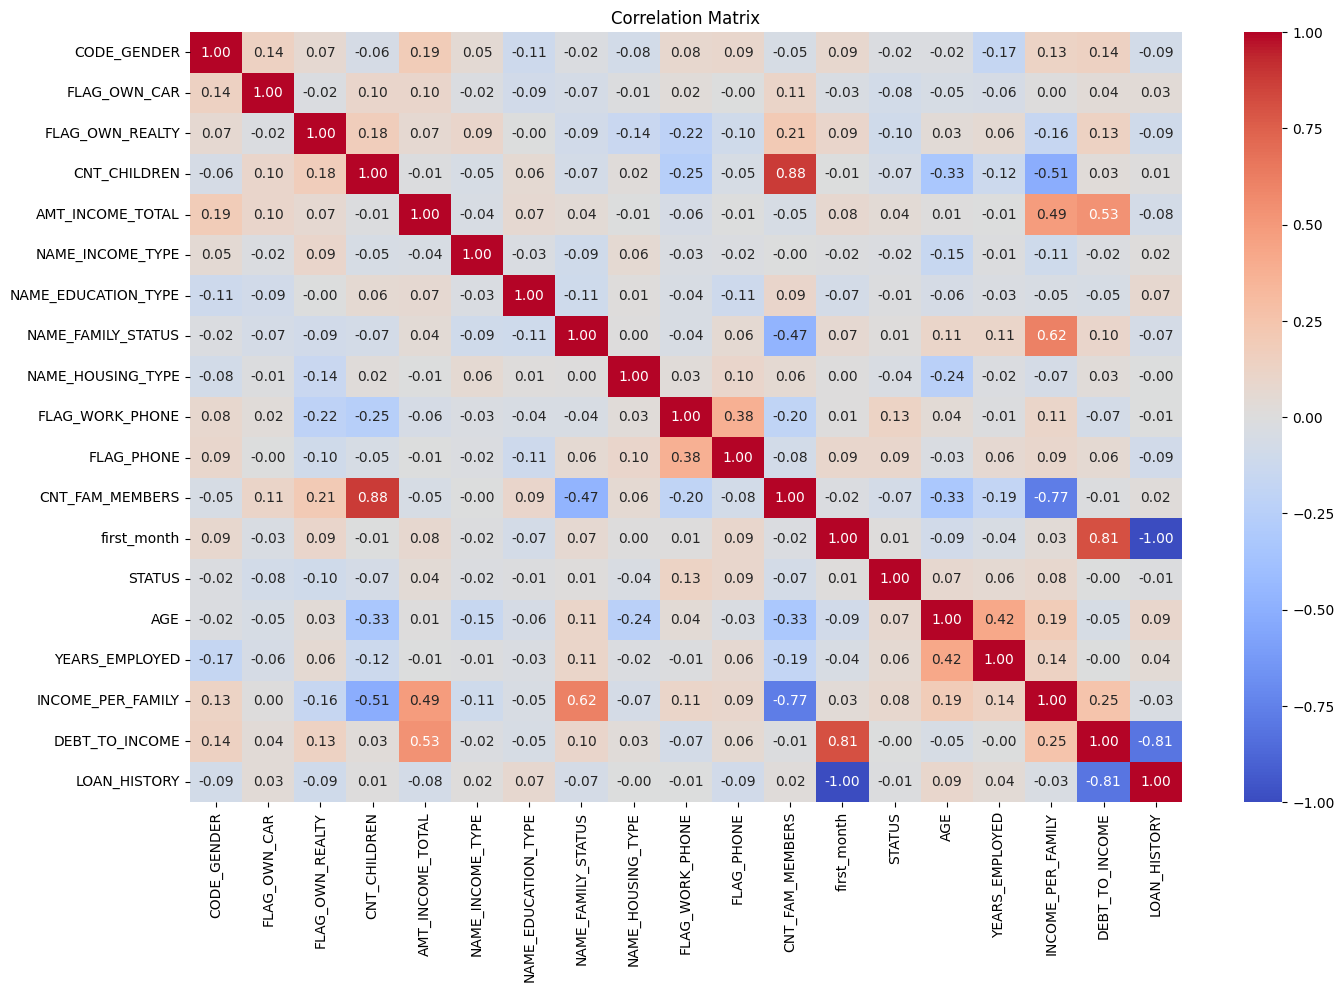

In [ ]:
correlation_matrix = data_balanced.select_dtypes(include=['int64', 'float64', 'bool']).corr()

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
from sklearn.model_selection import  train_test_split
x = data_balanced.drop(columns=["STATUS"]  , axis = 1 )
y = data_balanced["STATUS"]

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Langkah 1: One-hot encoding semua kolom kategorikal
x_encoded = pd.get_dummies(x, drop_first=True)

# Langkah 2: Standarisasi fitur
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_encoded)

# Langkah 3: Inisialisasi dan terapkan PCA
pca = PCA()  # bisa juga: PCA(n_components=2) jika hanya mau 2 komponen
pca_data = pca.fit_transform(x_scaled)

# Langkah 4: Buat DataFrame hasil transformasi
pca_df = pd.DataFrame(
    pca_data,
    columns=[f'Principal Component {i+1}' for i in range(pca_data.shape[1])]
)

# Langkah 5: Tampilkan hasil
print(pca_df.head())


   Principal Component 1  Principal Component 2  Principal Component 3  \
0              -2.434122              -2.959098               0.874511   
1              -2.943314               0.867568               1.774168   
2              -3.527755               0.813718              -0.095218   
3               0.068036               2.057846               0.656357   
4               3.114838               0.631266               2.315707   

   Principal Component 4  Principal Component 5  Principal Component 6  \
0               0.178135               0.518019               0.972366   
1               0.954265              -0.821185               2.187749   
2              -2.391032              -1.495389              -0.934247   
3               0.803898               0.676438              -0.120162   
4              -1.599623               2.278267               0.184996   

   Principal Component 7  Principal Component 8  Principal Component 9  \
0               0.062368            

In [ ]:
# Split Data
x_train, x_test, y_train, y_test = train_test_split(pca_df, y, test_size=0.2, random_state=42)

In [ ]:
# Random Forest Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the model with hyperparameters
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)  # Adjust hyperparameters

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(x_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Accuracy: 0.8872
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.81      0.87       149
         1.0       0.86      0.95      0.90       179

    accuracy                           0.89       328
   macro avg       0.89      0.88      0.88       328
weighted avg       0.89      0.89      0.89       328



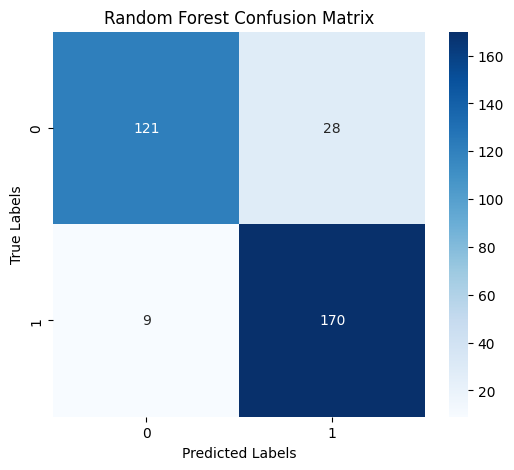

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix for the Random Forest model
rf_cm = confusion_matrix(y_test, rf_predictions)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# XGBoost Model

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the model with hyperparameters
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)  # Adjust hyperparameters

# Train the model
xgb_model.fit(x_train, y_train)

# Make predictions on the test set
xgb_predictions = xgb_model.predict(x_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))

XGBoost Accuracy: 0.8841
XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.81      0.86       149
         1.0       0.85      0.95      0.90       179

    accuracy                           0.88       328
   macro avg       0.89      0.88      0.88       328
weighted avg       0.89      0.88      0.88       328



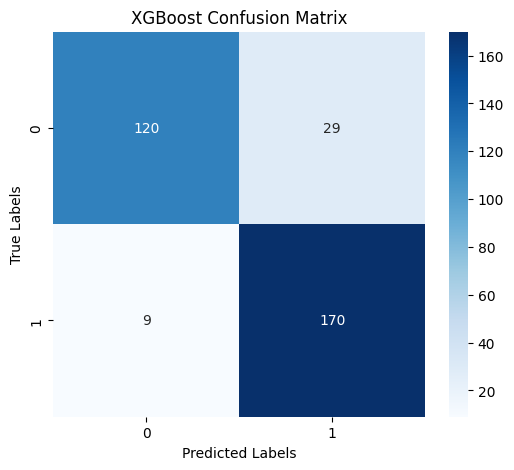

In [ ]:
# Generate the confusion matrix for the XGBoost model
xgb_cm = confusion_matrix(y_test, xgb_predictions)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

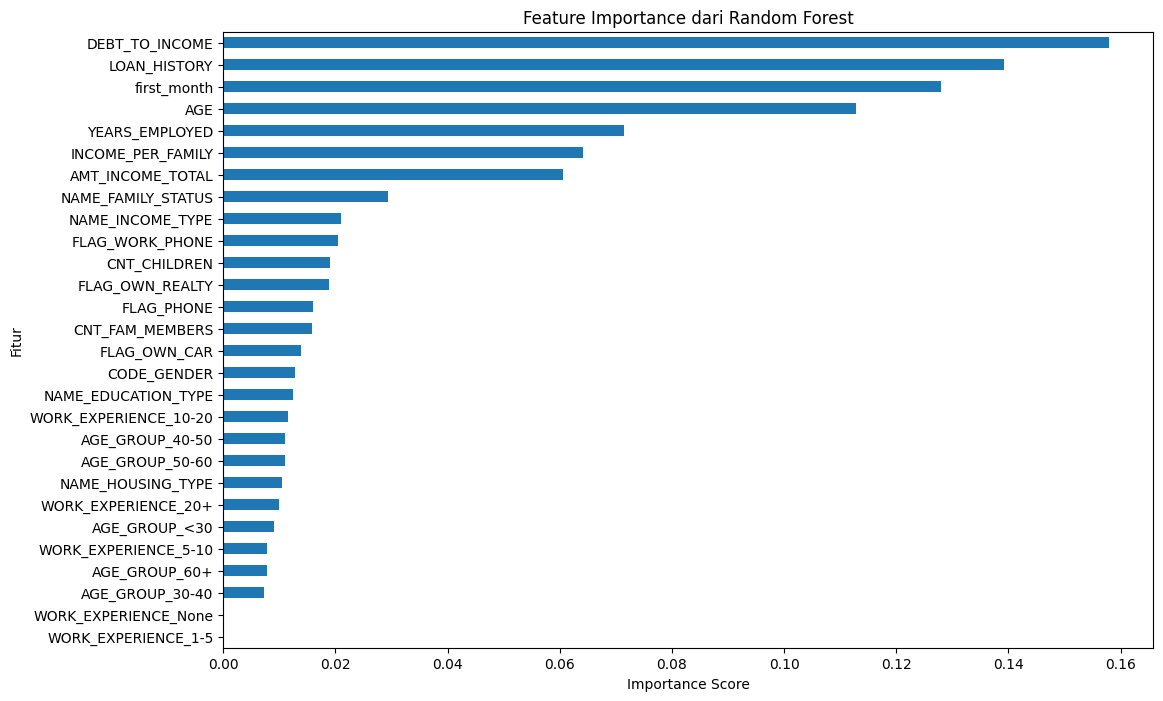

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = data.drop('STATUS', axis=1)
y = data['STATUS']

# Encode variabel kategorikal
X = pd.get_dummies(X)

# Bagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importance = rf.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(12, 8))
pd.Series(importance, index=features).sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importance dari Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Fitur')
plt.show()

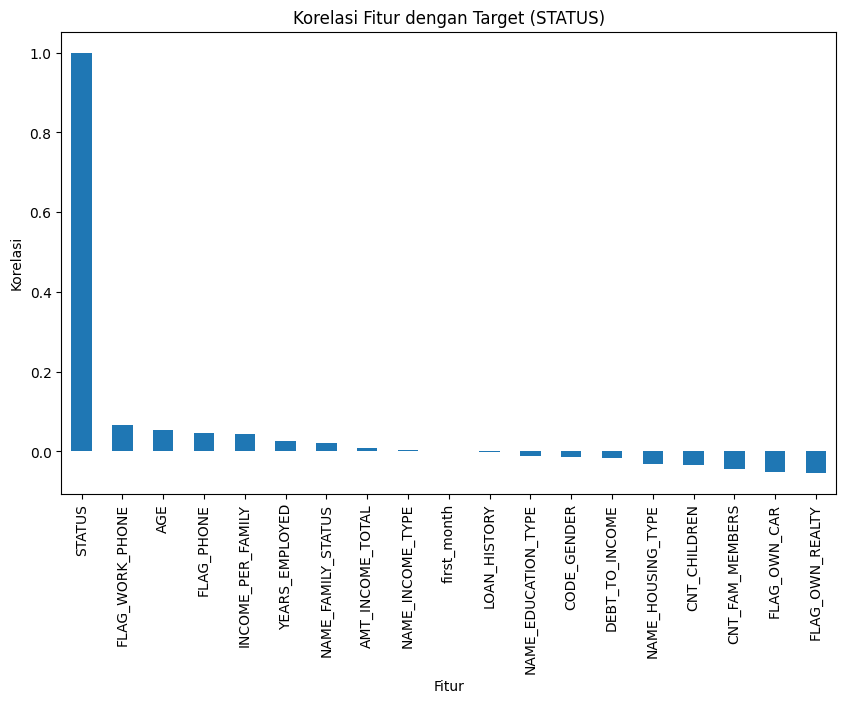

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung korelasi
corr = data.select_dtypes(include=['int64', 'float64', 'bool']).corr()


# Plot korelasi dengan target
plt.figure(figsize=(10, 6))
corr['STATUS'].sort_values(ascending=False).plot(kind='bar')
plt.title('Korelasi Fitur dengan Target (STATUS)')
plt.xlabel('Fitur')
plt.ylabel('Korelasi')
plt.show()

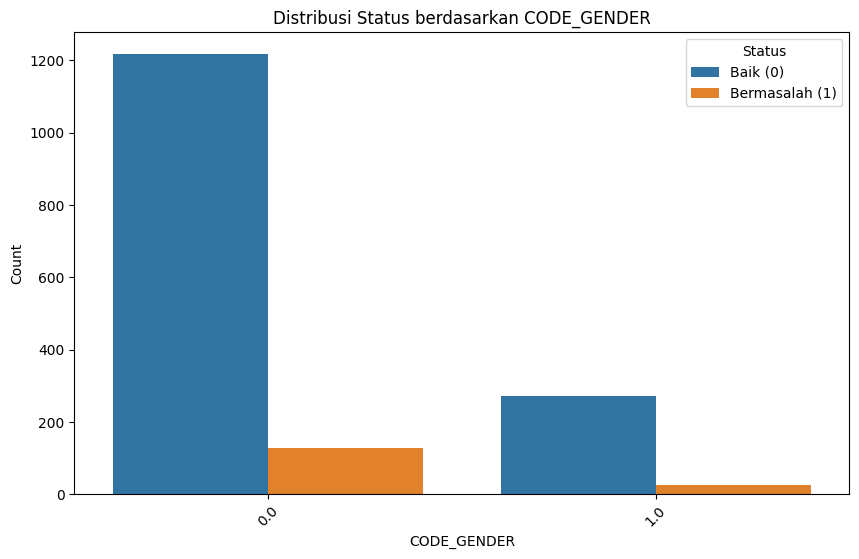

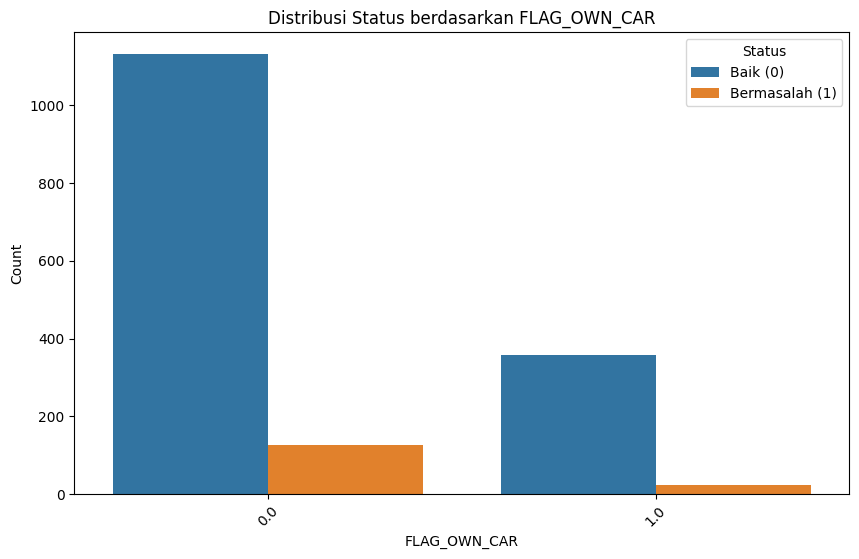

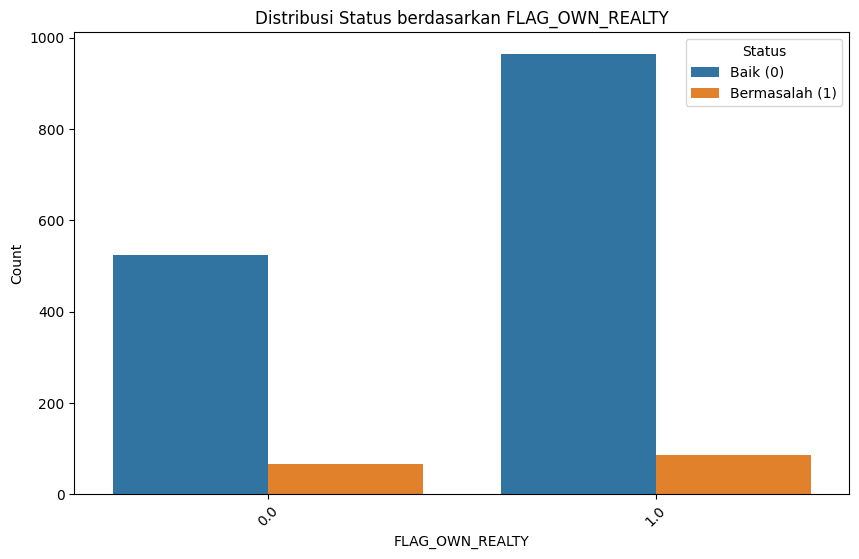

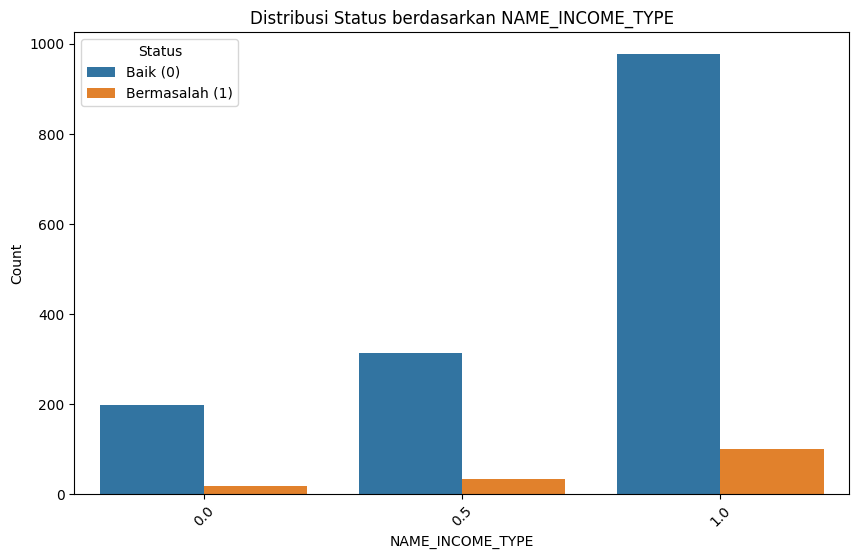

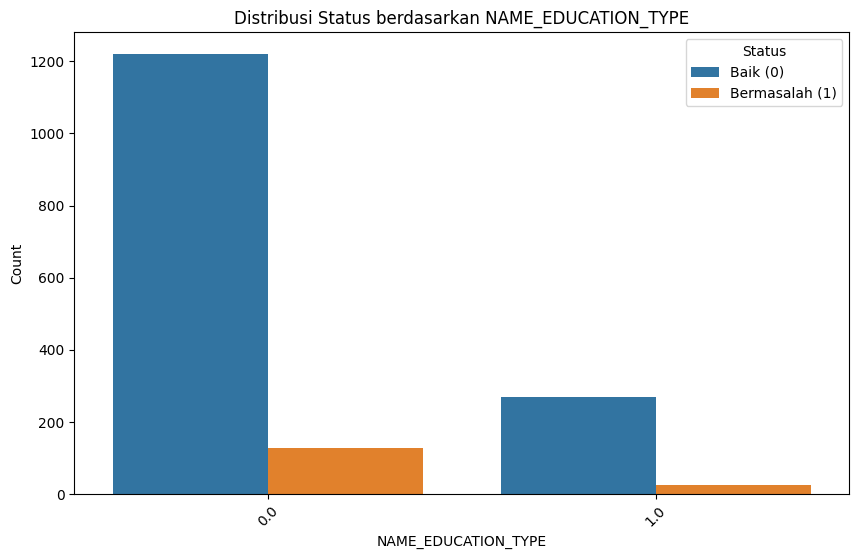

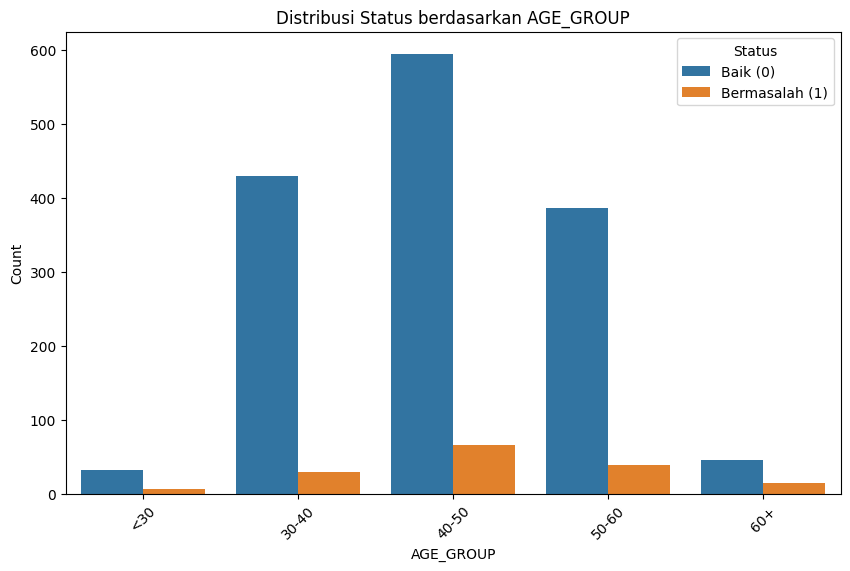

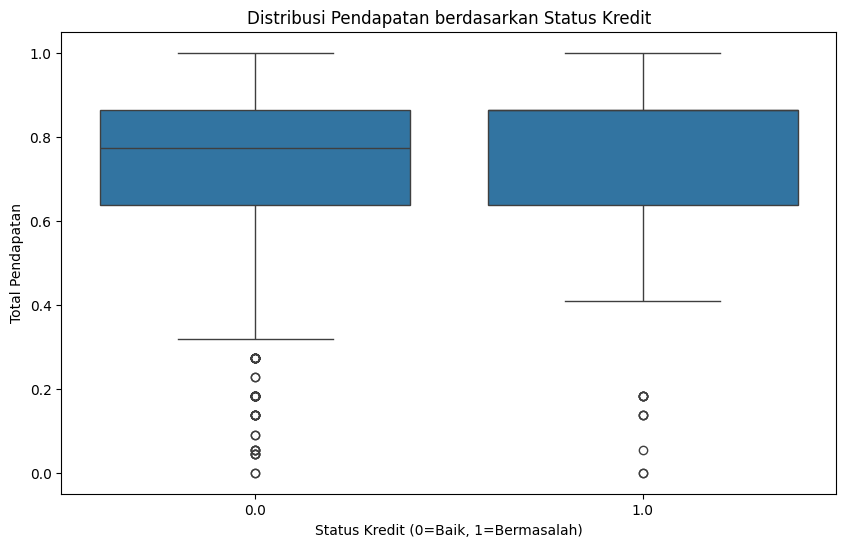

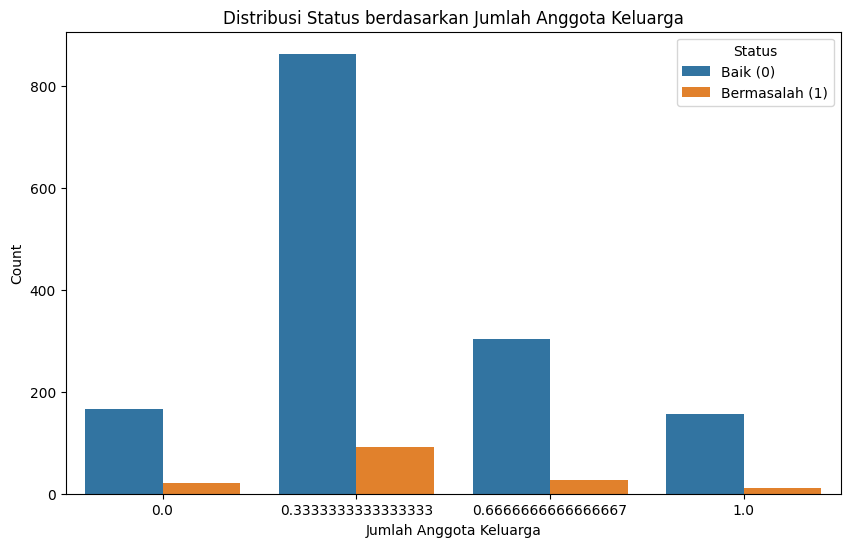

In [ ]:
# Fungsi untuk membuat plot hubungan antara status dan fitur lain
def plot_status_vs_feature(feature):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=feature, hue='STATUS')
    plt.title(f'Distribusi Status berdasarkan {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Status', labels=['Baik (0)', 'Bermasalah (1)'])
    plt.xticks(rotation=45)
    plt.show()

# Plot untuk beberapa fitur penting
plot_status_vs_feature('CODE_GENDER')
plot_status_vs_feature('FLAG_OWN_CAR')
plot_status_vs_feature('FLAG_OWN_REALTY')
plot_status_vs_feature('NAME_INCOME_TYPE')
plot_status_vs_feature('NAME_EDUCATION_TYPE')
plot_status_vs_feature('AGE_GROUP')

# Membuat kelompok usia
data['AGE_GROUP'] = pd.cut(data['AGE'], bins=[0, 30, 40, 50, 60, 100],
                          labels=['<30', '30-40', '40-50', '50-60', '60+'])

# Plot hubungan status dengan pendapatan
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='STATUS', y='AMT_INCOME_TOTAL')
plt.title('Distribusi Pendapatan berdasarkan Status Kredit')
plt.xlabel('Status Kredit (0=Baik, 1=Bermasalah)')
plt.ylabel('Total Pendapatan')
plt.show()

# Plot hubungan status dengan jumlah anggota keluarga
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='CNT_FAM_MEMBERS', hue='STATUS')
plt.title('Distribusi Status berdasarkan Jumlah Anggota Keluarga')
plt.xlabel('Jumlah Anggota Keluarga')
plt.ylabel('Count')
plt.legend(title='Status', labels=['Baik (0)', 'Bermasalah (1)'])
plt.show()

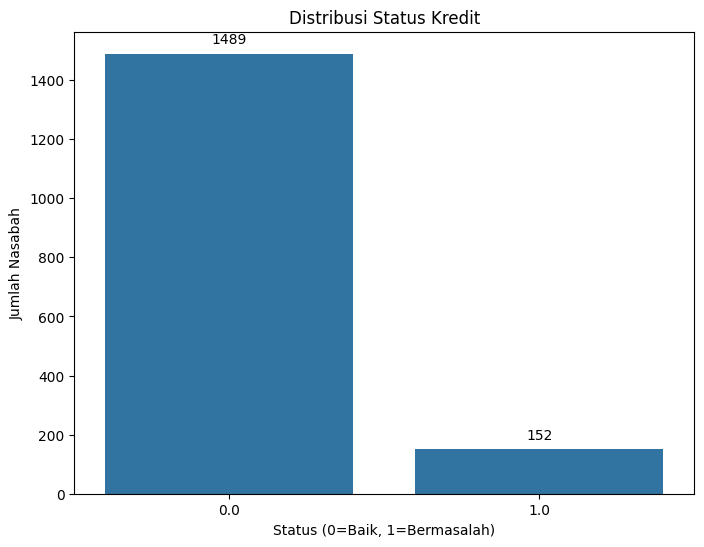

In [ ]:
# Visualisasi distribusi status kredit dengan label angka
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data, x='STATUS')
plt.title('Distribusi Status Kredit')
plt.xlabel('Status (0=Baik, 1=Bermasalah)')
plt.ylabel('Jumlah Nasabah')

# Menambahkan label angka di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

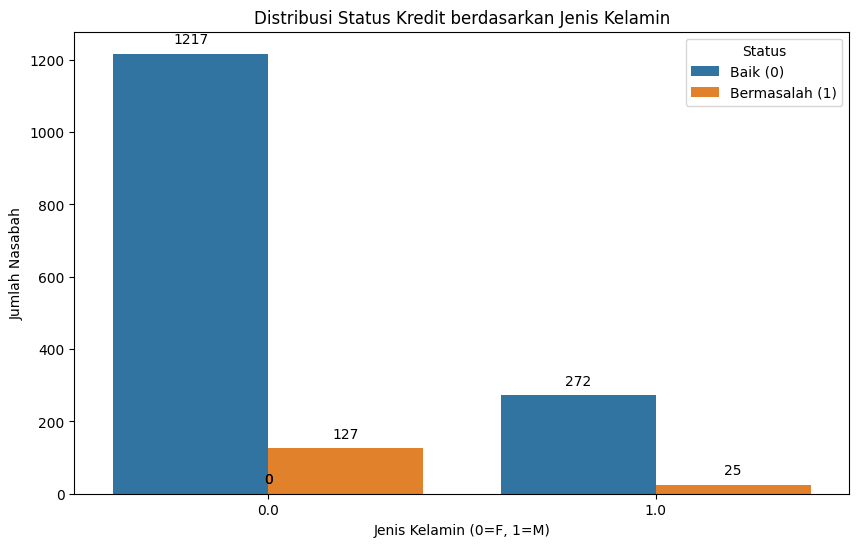

In [ ]:
# Visualisasi status vs jenis kelamin dengan label angka
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='CODE_GENDER', hue='STATUS')
plt.title('Distribusi Status Kredit berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin (0=F, 1=M)')
plt.ylabel('Jumlah Nasabah')
plt.legend(title='Status', labels=['Baik (0)', 'Bermasalah (1)'])

# Menambahkan label angka di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

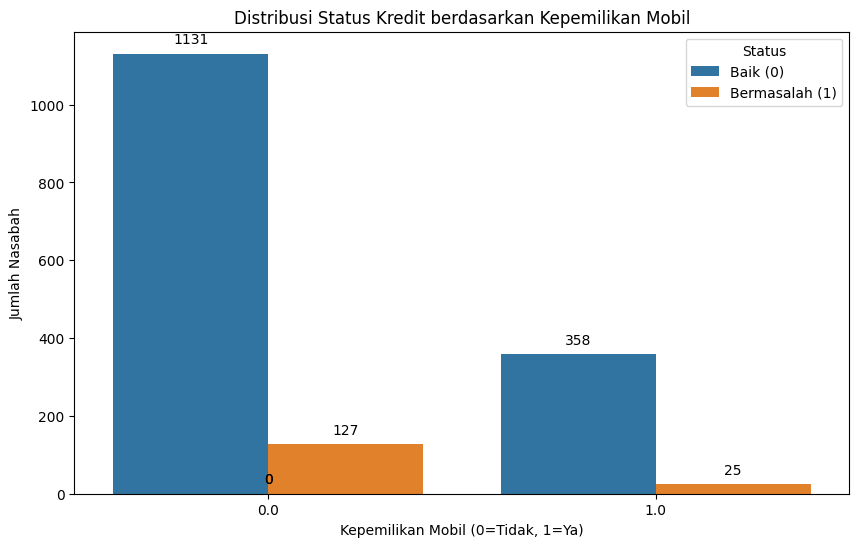

In [ ]:
# Visualisasi status vs kepemilikan mobil dengan label angka
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='FLAG_OWN_CAR', hue='STATUS')
plt.title('Distribusi Status Kredit berdasarkan Kepemilikan Mobil')
plt.xlabel('Kepemilikan Mobil (0=Tidak, 1=Ya)')
plt.ylabel('Jumlah Nasabah')
plt.legend(title='Status', labels=['Baik (0)', 'Bermasalah (1)'])

# Menambahkan label angka di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

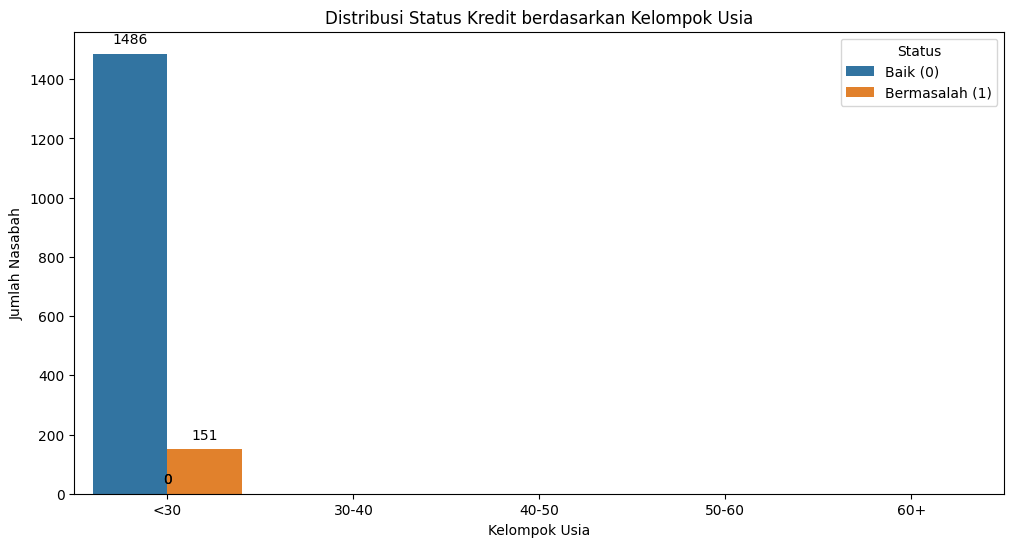

In [ ]:
# Membuat kelompok usia
data['AGE_GROUP'] = pd.cut(data['AGE'], bins=[0, 30, 40, 50, 60, 100],
                          labels=['<30', '30-40', '40-50', '50-60', '60+'])

# Visualisasi status vs kelompok usia dengan label angka
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=data, x='AGE_GROUP', hue='STATUS', order=['<30', '30-40', '40-50', '50-60', '60+'])
plt.title('Distribusi Status Kredit berdasarkan Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Nasabah')
plt.legend(title='Status', labels=['Baik (0)', 'Bermasalah (1)'])

# Menambahkan label angka di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

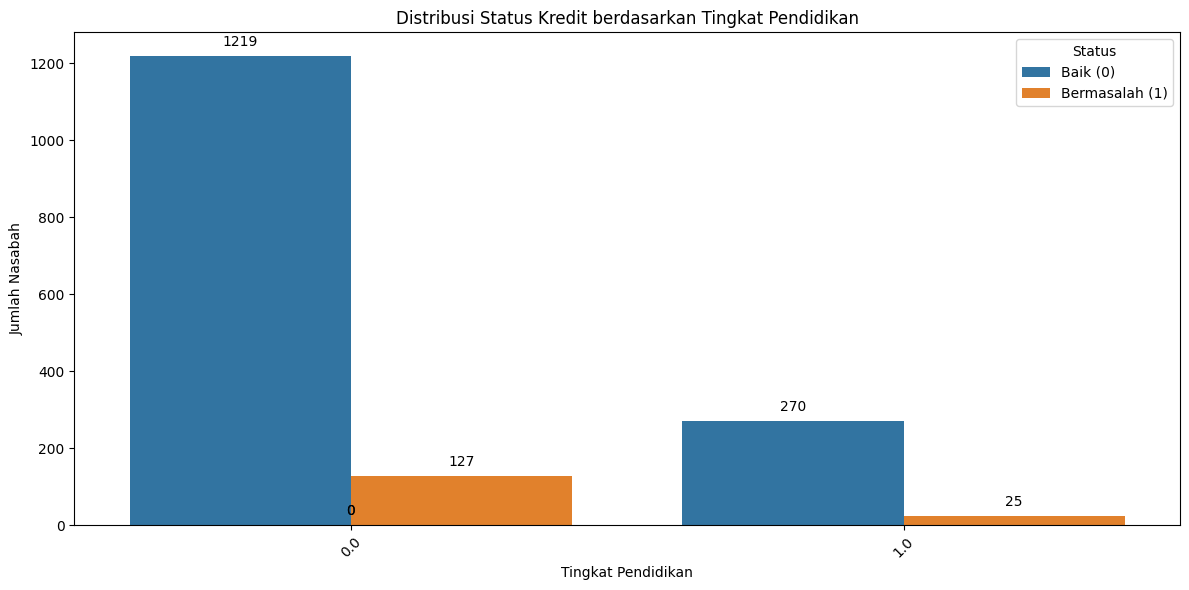

In [ ]:
# Visualisasi status vs tingkat pendidikan dengan label angka
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=data, x='NAME_EDUCATION_TYPE', hue='STATUS')
plt.title('Distribusi Status Kredit berdasarkan Tingkat Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah Nasabah')
plt.legend(title='Status', labels=['Baik (0)', 'Bermasalah (1)'])
plt.xticks(rotation=45)

# Menambahkan label angka di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()
plt.show()

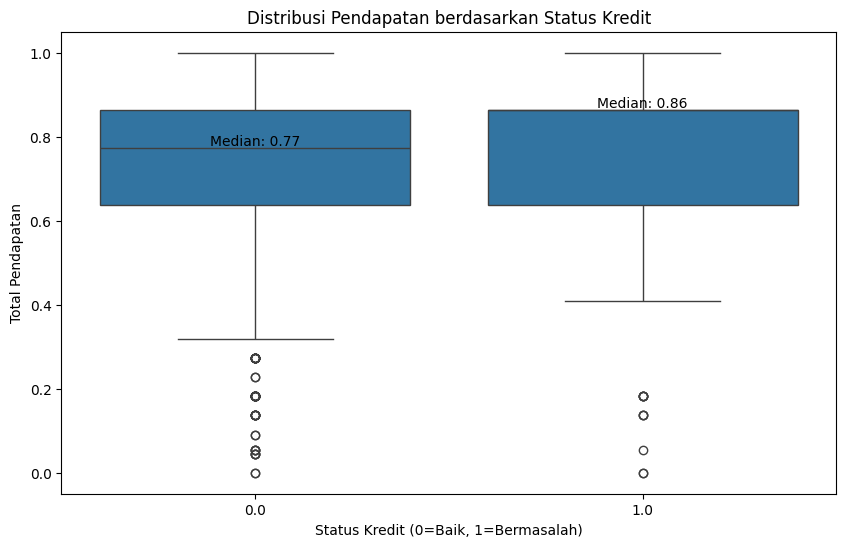

In [ ]:
# Visualisasi status vs pendapatan dengan label statistik
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=data, x='STATUS', y='AMT_INCOME_TOTAL')
plt.title('Distribusi Pendapatan berdasarkan Status Kredit')
plt.xlabel('Status Kredit (0=Baik, 1=Bermasalah)')
plt.ylabel('Total Pendapatan')

# Menambahkan label untuk median
medians = data.groupby('STATUS')['AMT_INCOME_TOTAL'].median()
for xtick in ax.get_xticks():
    ax.text(xtick, medians[xtick], f'Median: {medians[xtick]:.2f}',
            horizontalalignment='center',
            verticalalignment='bottom',
            color='black', fontsize=10)

plt.show()